# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

## Initializations and data loading

In [ ]:
#Student / Number_NOVA_IMS_CV
#Anderlina Marcal / 20222015
#Daniel Moreira / 20222023
#Elizangela Fernandes / 20222029
#João Carlos Fidalgo / 20222059 
#Grupo K

In [ ]:
#CRISP-DM process model
#1. Business Understanding
#2. Data Understanding
#3. Data Preparation
#4. Modeling
#5. Evaluation
#6. Deployment

##### 1.Business Understanding

In [1]:
"""
Dataset = default_credit_card_clients.xlsx

## Dataset description

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6-X11: History of past payment. 
    We tracked the past monthly payment records (from April to September, 2005) as follows: 
        X6 = the repayment status in September, 2005; 
        X7 = the repayment status in August, 2005;
        X8= the repayment status in July, 2005;
        X9= the repayment status in June, 2005;
        X10= the repayment status in May, 2005;
        X11 = the repayment status in April, 2005. 
        The measurement scale for the repayment status is: 
           -1 = pay duly; 
            1 = payment delay for one month; 
            2 = payment delay for two months;
            3 = payment delay for three months;
            4 = payment delay for four months;
            5 = payment delay for five months;
            6 = payment delay for six months;
            7 = payment delay for seven months;
            8 = payment delay for eight months; 
            9 = payment delay for nine months and above. 

- X12-X17: Amount of bill statement (NT dollar). 
    X12 = amount of bill statement in September, 2005; 
    X13 = amount of bill statement in August, 2005;
    X14 = amount of bill statement in July, 2005;
    X15 = amount of bill statement in June, 2005;
    X16 = amount of bill statement in May, 2005; 
    X17 = amount of bill statement in April, 2005. 

- X18-X23: Amount of previous payment (NT dollar). 
    X18 = amount paid in September, 2005; 
    X19 = amount paid in August, 2005;
    X20 = amount paid in July, 2005;
    X21 = amount paid in June, 2005;
    X22 = amount paid in May, 2005;
    X23 = amount paid in April, 2005.

- Y: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

1-Develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.
2-Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.

"""

'\nDataset = default_credit_card_clients.xlsx\n\n## Dataset description\n\n- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \n- X2: Gender (1 = male; 2 = female). \n- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). \n- X4: Marital status (1 = married; 2 = single; 3 = others). \n- X5: Age (year). \n- X6-X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. \n- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2

In [61]:
# Loading packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# Importing packages modeling and 
from traceback import print_tb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.model_selection import RFECV
from sklearn import tree



In [3]:
# Loading the dataset and visualizing summary statistics
# Path: 4-MLF_Machine Learning for Finance\Project 2\default_credit_card_clients.xlsx
df = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl')
df.head(20)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
#concatenating name columns with 1st row
df.columns = df.iloc[0]
ds = df.iloc[1:]
ds.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
ds.describe(include='all').T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [6]:

print(ds['default payment next month'].value_counts())
print(ds['default payment next month'].value_counts(normalize=True))



0    23364
1     6636
Name: default payment next month, dtype: int64
0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


In [8]:
#The dataset contains 30,000 observations and 25 variables. 
#The dataset is unbalanced with Y 23,364 observations of non-defaulters and 6,636 observations of defaulters.´
#The dataset contains 23 numerical variables and 2 categorical variables.
#numerical variables: X1 = Amount of the given credit (NT dollar), X5 = Age (year), X12-X17 = Amount of bill statement (NT dollar), X18-X23 = Amount of previous payment (NT dollar)
#categorical variables: X2 = Sex, X3 = Education, X4 = Marital status

def to_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df

ds = to_categorical(ds, ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month'])
ds.describe(include='all').T
ds.dtypes

#removing ID column
#ds = ds.drop(['ID'], axis=1)



0
LIMIT_BAL                       object
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                             object
PAY_0                           object
PAY_2                           object
PAY_3                           object
PAY_4                           object
PAY_5                           object
PAY_6                           object
BILL_AMT1                       object
BILL_AMT2                       object
BILL_AMT3                       object
BILL_AMT4                       object
BILL_AMT5                       object
BILL_AMT6                       object
PAY_AMT1                        object
PAY_AMT2                        object
PAY_AMT3                        object
PAY_AMT4                        object
PAY_AMT5                        object
PAY_AMT6                        object
default payment next month    category
dtype: object

#### 2.Data Understanding

In [9]:
#count 0 values in each column
ds.isin([0]).sum(axis=0)

0
LIMIT_BAL                         0
SEX                               0
EDUCATION                        14
MARRIAGE                         54
AGE                               0
PAY_0                         14737
PAY_2                         15730
PAY_3                         15764
PAY_4                         16455
PAY_5                         16947
PAY_6                         16286
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default payment next month    23364
dtype: int64

In [10]:
#the data is not clean, there are 0 values in the columns
# must be replaced with NaN values to be able to drop them
ds = ds.replace(0, np.nan)
ds.isin([0]).sum(axis=0)


0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [108]:
#drop rows with NaN values
#ds = ds.dropna()
#ds.isin([0]).sum(axis=0)


In [11]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,,,,,,,,,,,
LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29986.0,6.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29946.0,3.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,30000.0,NaN,NaN,NaN,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,15263.0,NaN,NaN,NaN,-0.032824,1.575400,-2.0,-1.00,-1.0,1.00,8.0
PAY_2,14270.0,NaN,NaN,NaN,-0.281219,1.723888,-2.0,-2.00,-1.0,2.00,8.0
PAY_3,14236.0,NaN,NaN,NaN,-0.350239,1.718833,-2.0,-2.00,-1.0,2.00,8.0
PAY_4,13545.0,NaN,NaN,NaN,-0.488741,1.701918,-2.0,-2.00,-1.0,2.00,8.0


In [110]:
ds['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [111]:
ds['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

In [112]:
ds['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

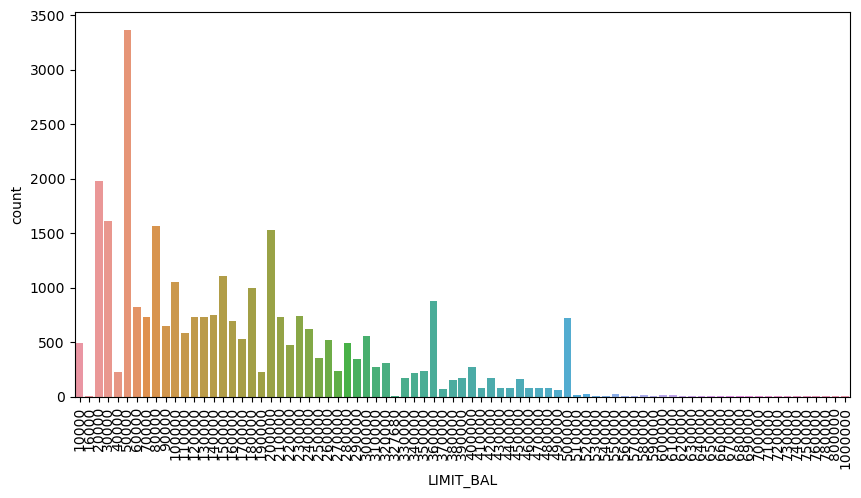

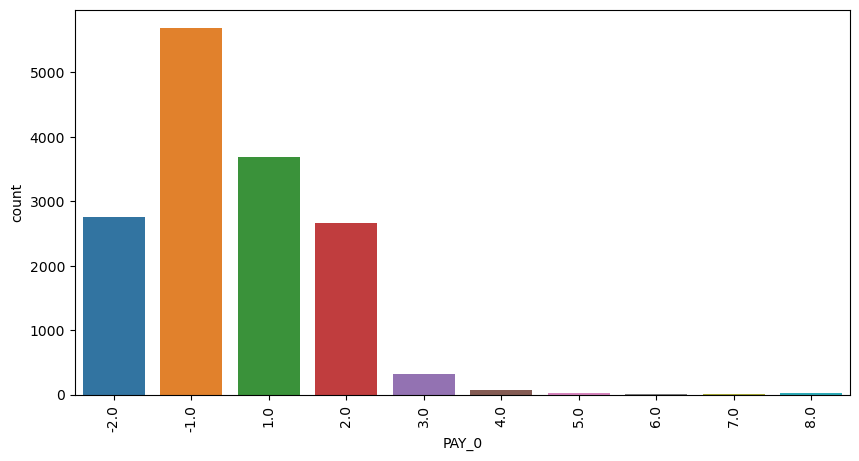

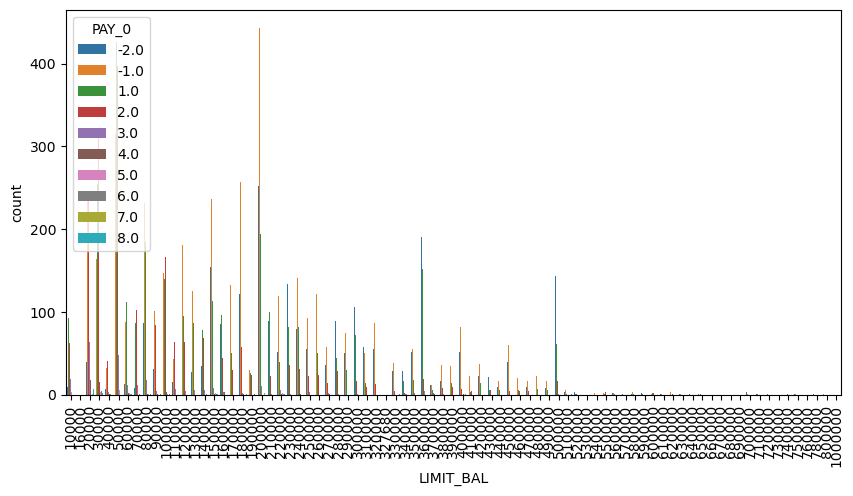

In [12]:
# Visual exploration of the cross table bar plots
def plot_cross_table_bar(df, x, y, hue=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=y, data=df)
    plt.xticks(rotation=90)
    plt.show()


# Visual exploration of the cross table bar plots
plot_cross_table_bar(ds, 'LIMIT_BAL', 'PAY_0')

In [13]:
# DrivAge max and min values
print(ds['AGE'].max())
print(ds['AGE'].min())

79
21


In [14]:
ds['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [15]:
##create new colum to group AGE bins interval based on distribution/quartiles, min 21, 25% = 28, 50% = 34 , 75% = 41, max 79
ds['AGeGroup'] = pd.cut(ds['AGE'], bins=[18, 34, 44, 55, 100], labels=['21-28', '28-34', '34-41', '41-79'])
ds['AGeGroup'].value_counts()

21-28    15696
28-34     9018
34-41     4442
41-79      844
Name: AGeGroup, dtype: int64

In [16]:
#removing ID column
ds.describe(include='all').T
#ds = ds.drop(['ID'], axis=1)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,,,,,,,,,,,
LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29986.0,6.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29946.0,3.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,30000.0,NaN,NaN,NaN,35.4855,9.217904,21.0,28.0,34.0,41.0,79.0
PAY_0,15263.0,NaN,NaN,NaN,-0.032824,1.5754,-2.0,-1.0,-1.0,1.0,8.0
PAY_2,14270.0,NaN,NaN,NaN,-0.281219,1.723888,-2.0,-2.0,-1.0,2.0,8.0
PAY_3,14236.0,NaN,NaN,NaN,-0.350239,1.718833,-2.0,-2.0,-1.0,2.0,8.0
PAY_4,13545.0,NaN,NaN,NaN,-0.488741,1.701918,-2.0,-2.0,-1.0,2.0,8.0


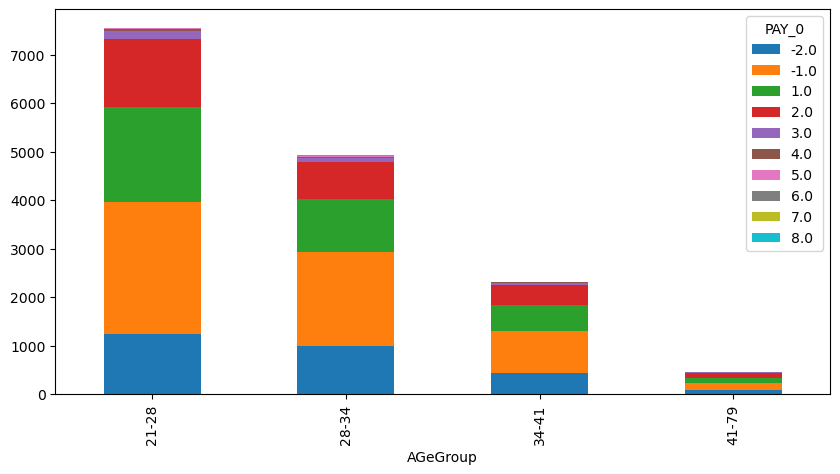

In [17]:
table1=pd.crosstab(index=ds['AGeGroup'],columns=ds['PAY_0'])
table1.plot(kind="bar",figsize=(10,5),stacked=True)
plt.show()

In [18]:
# Do histograms select just  numeric variables
ds = to_categorical(ds, ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month', 'AGeGroup'])
ds.describe(include='all').T
ds.dtypes

# Ckeck the top counts of all categorical variables
for col in ds.select_dtypes(include=['category']).columns:
    print(col)
    print(ds[col].value_counts())
    print('')

SEX
2    18112
1    11888
Name: SEX, dtype: int64

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

MARRIAGE
2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

default payment next month
1    6636
Name: default payment next month, dtype: int64

AGeGroup
21-28    15696
28-34     9018
34-41     4442
41-79      844
Name: AGeGroup, dtype: int64



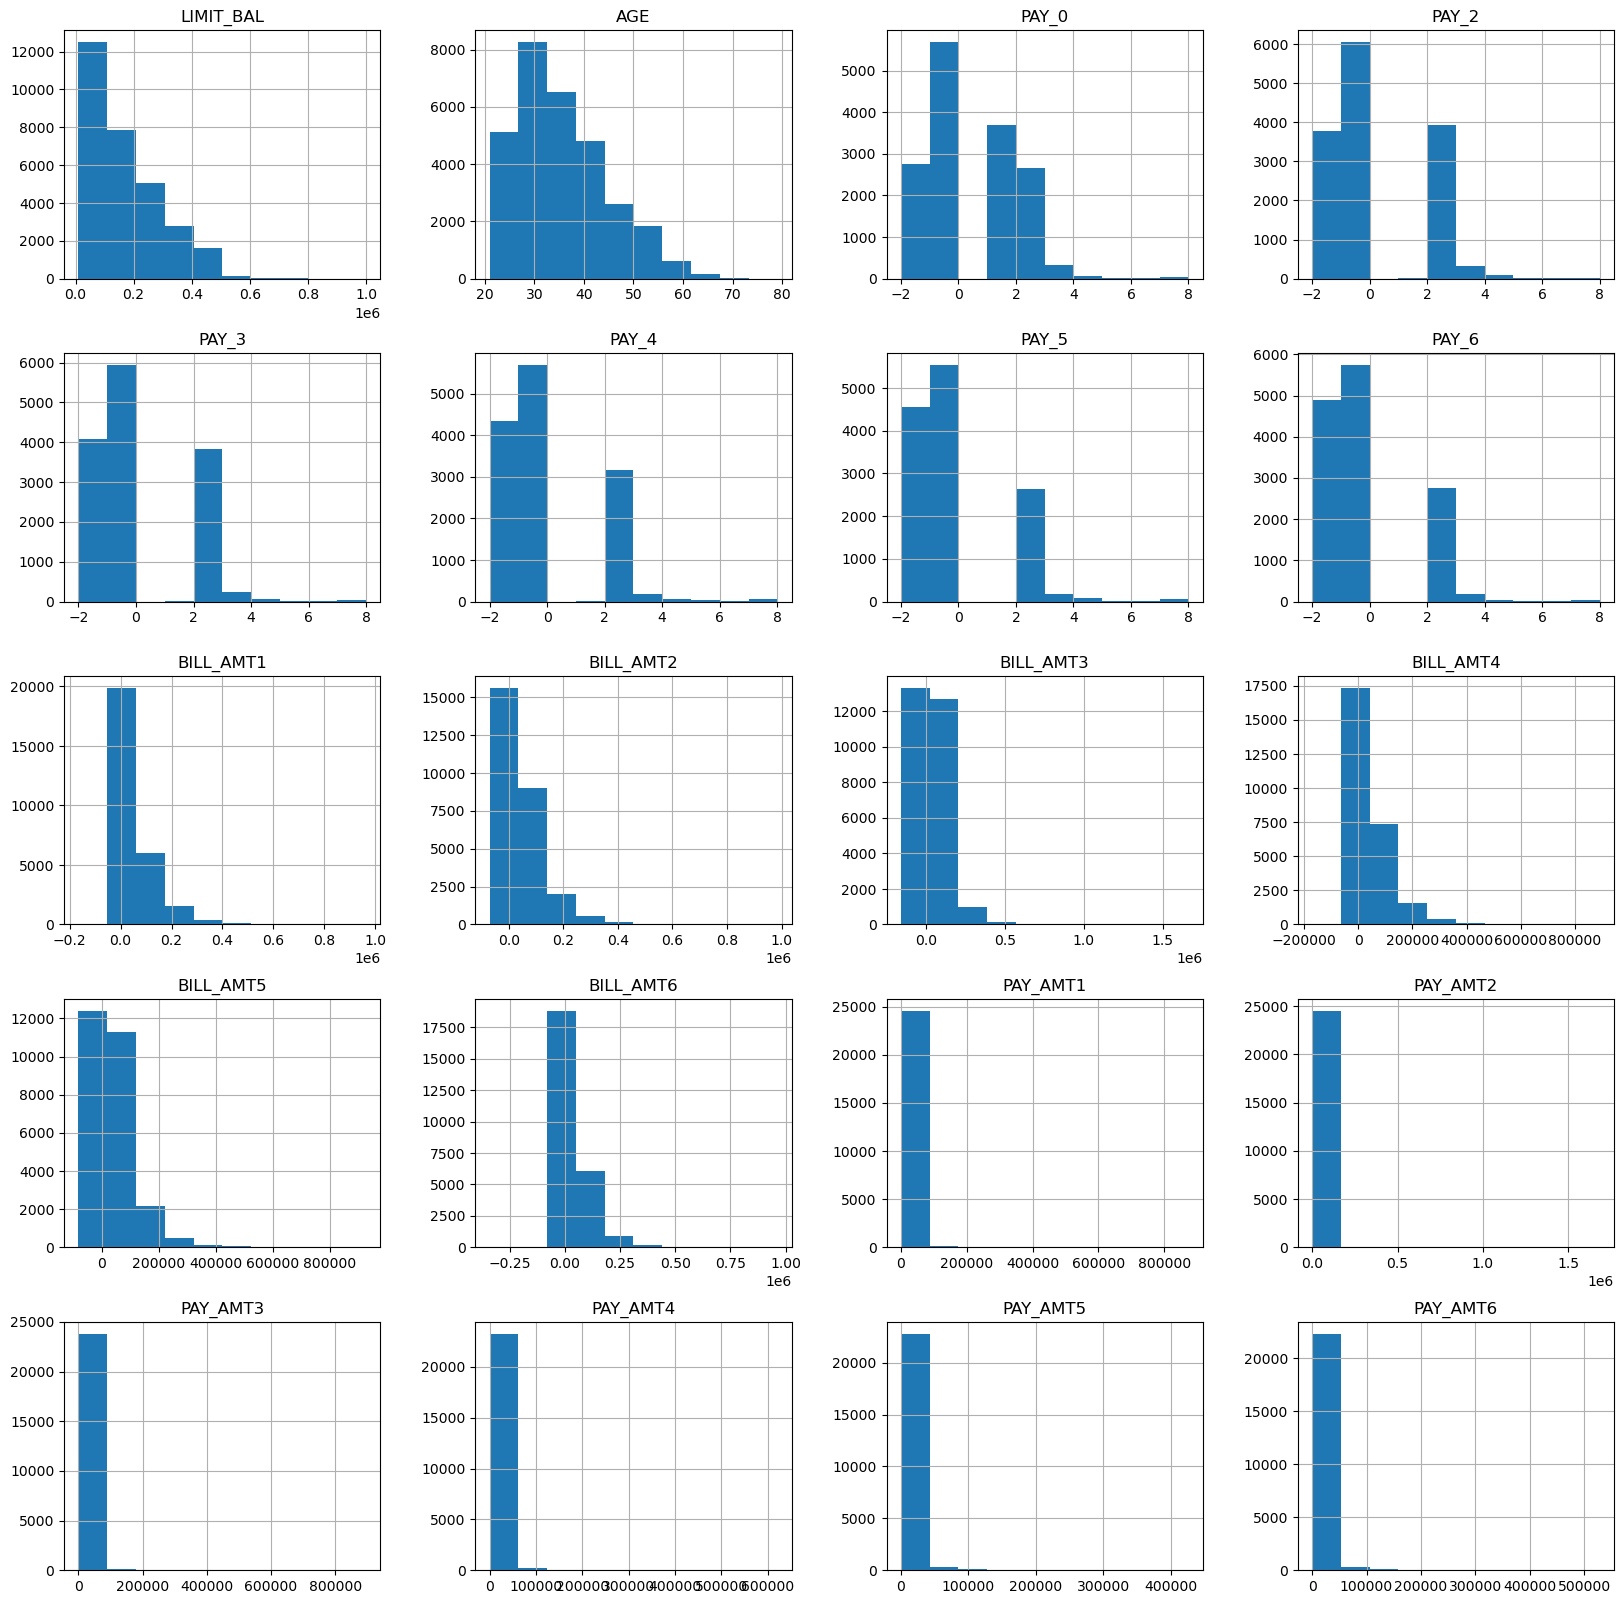

In [19]:
# Do histograms select just  numeric variables

numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

ds[numerical].hist(figsize=(20,20))
plt.show()


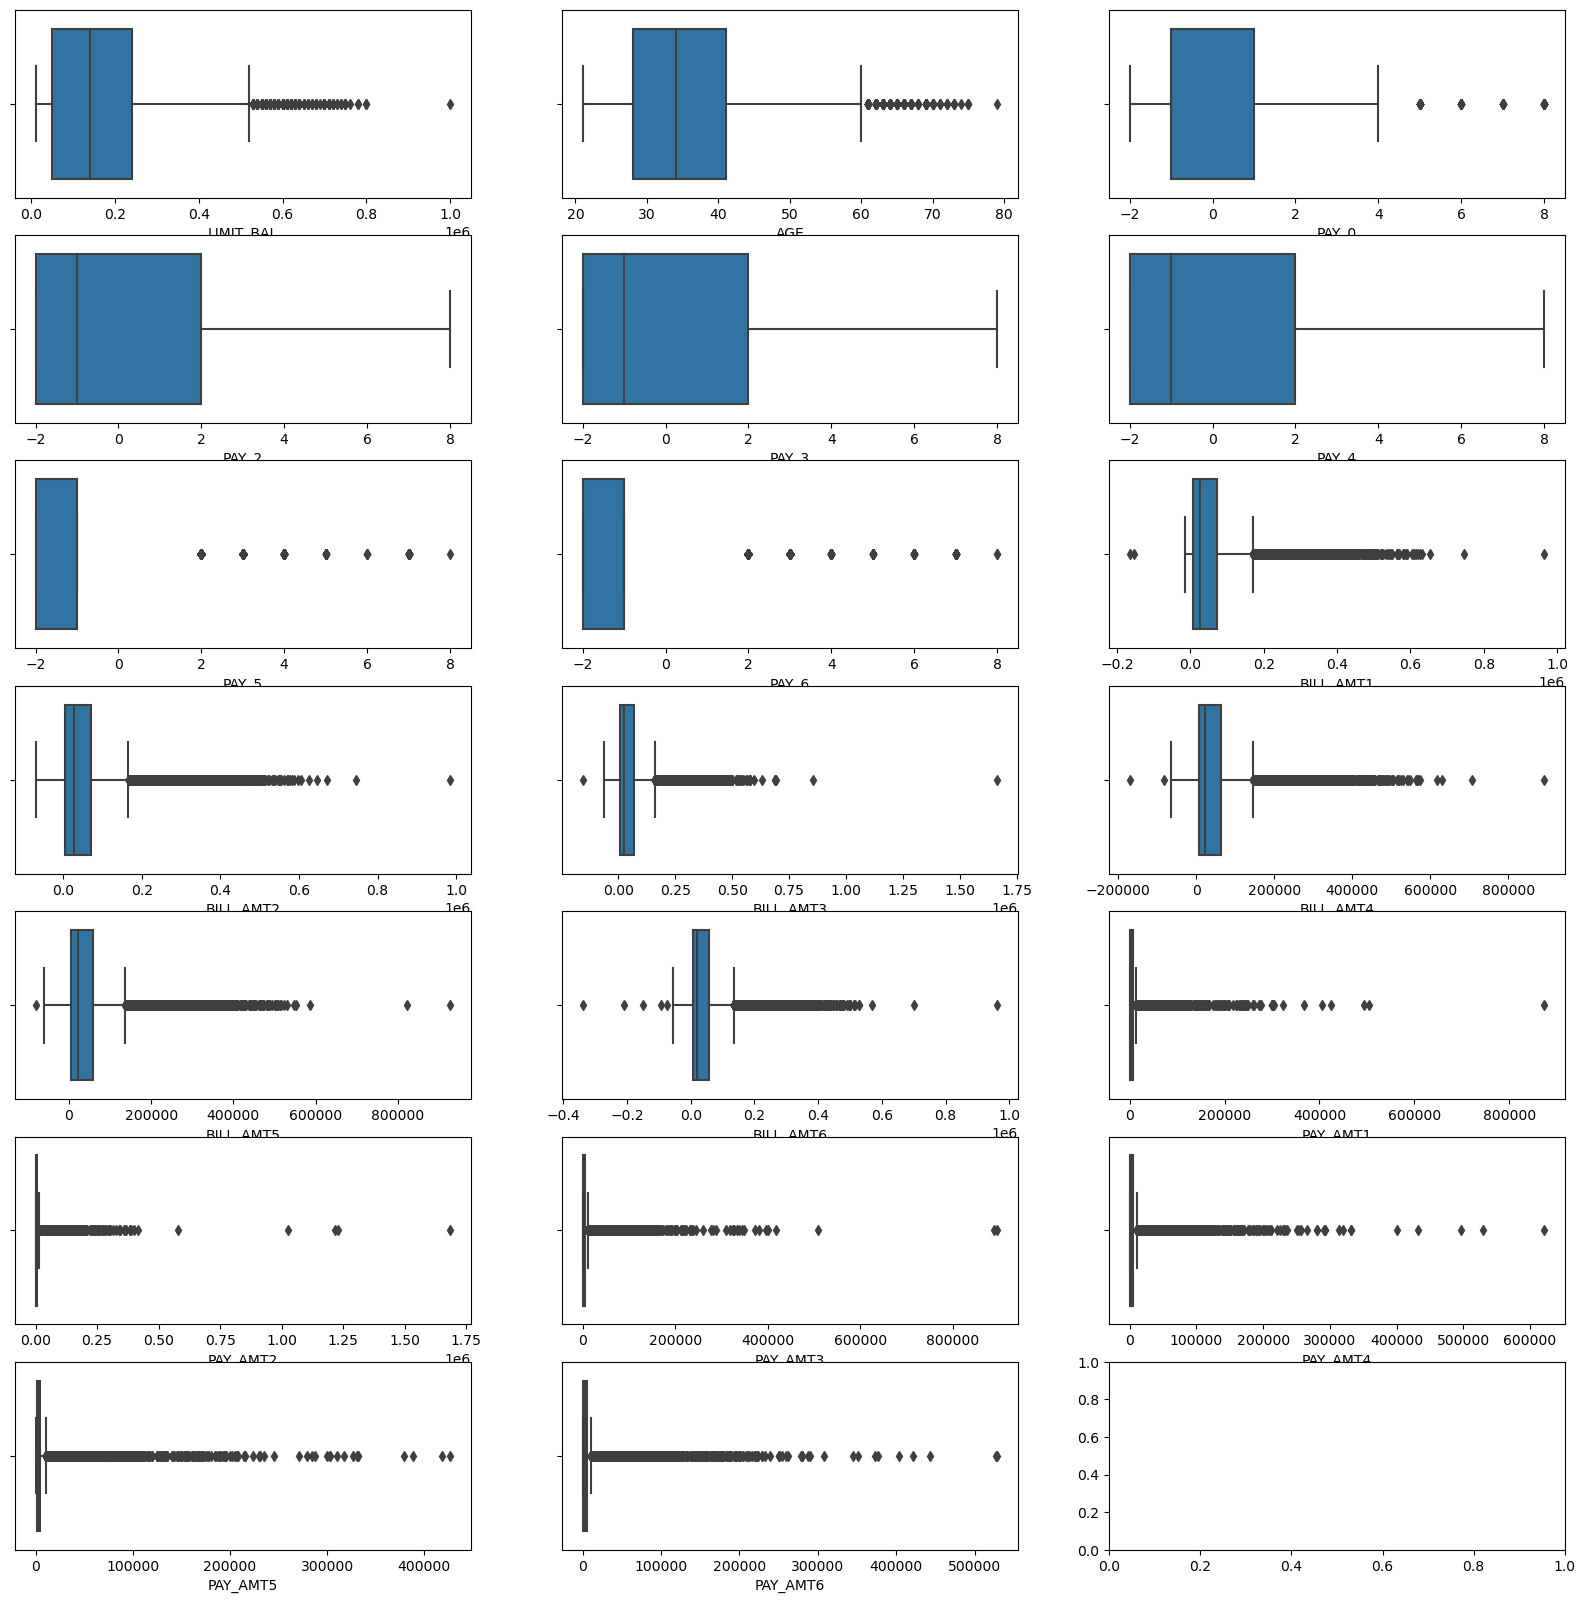

In [20]:
# Do boxplots select just  numeric variables
fig, ax = plt.subplots(7, 3, figsize=(20, 20))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


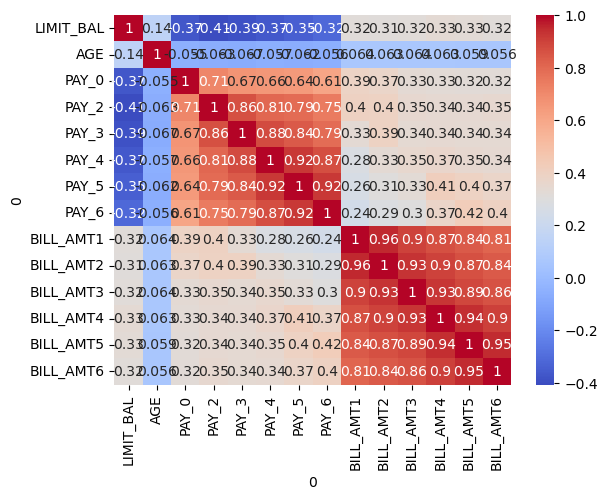

In [22]:
#Does the boxplots show any interesting patterns?
corr = ds[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

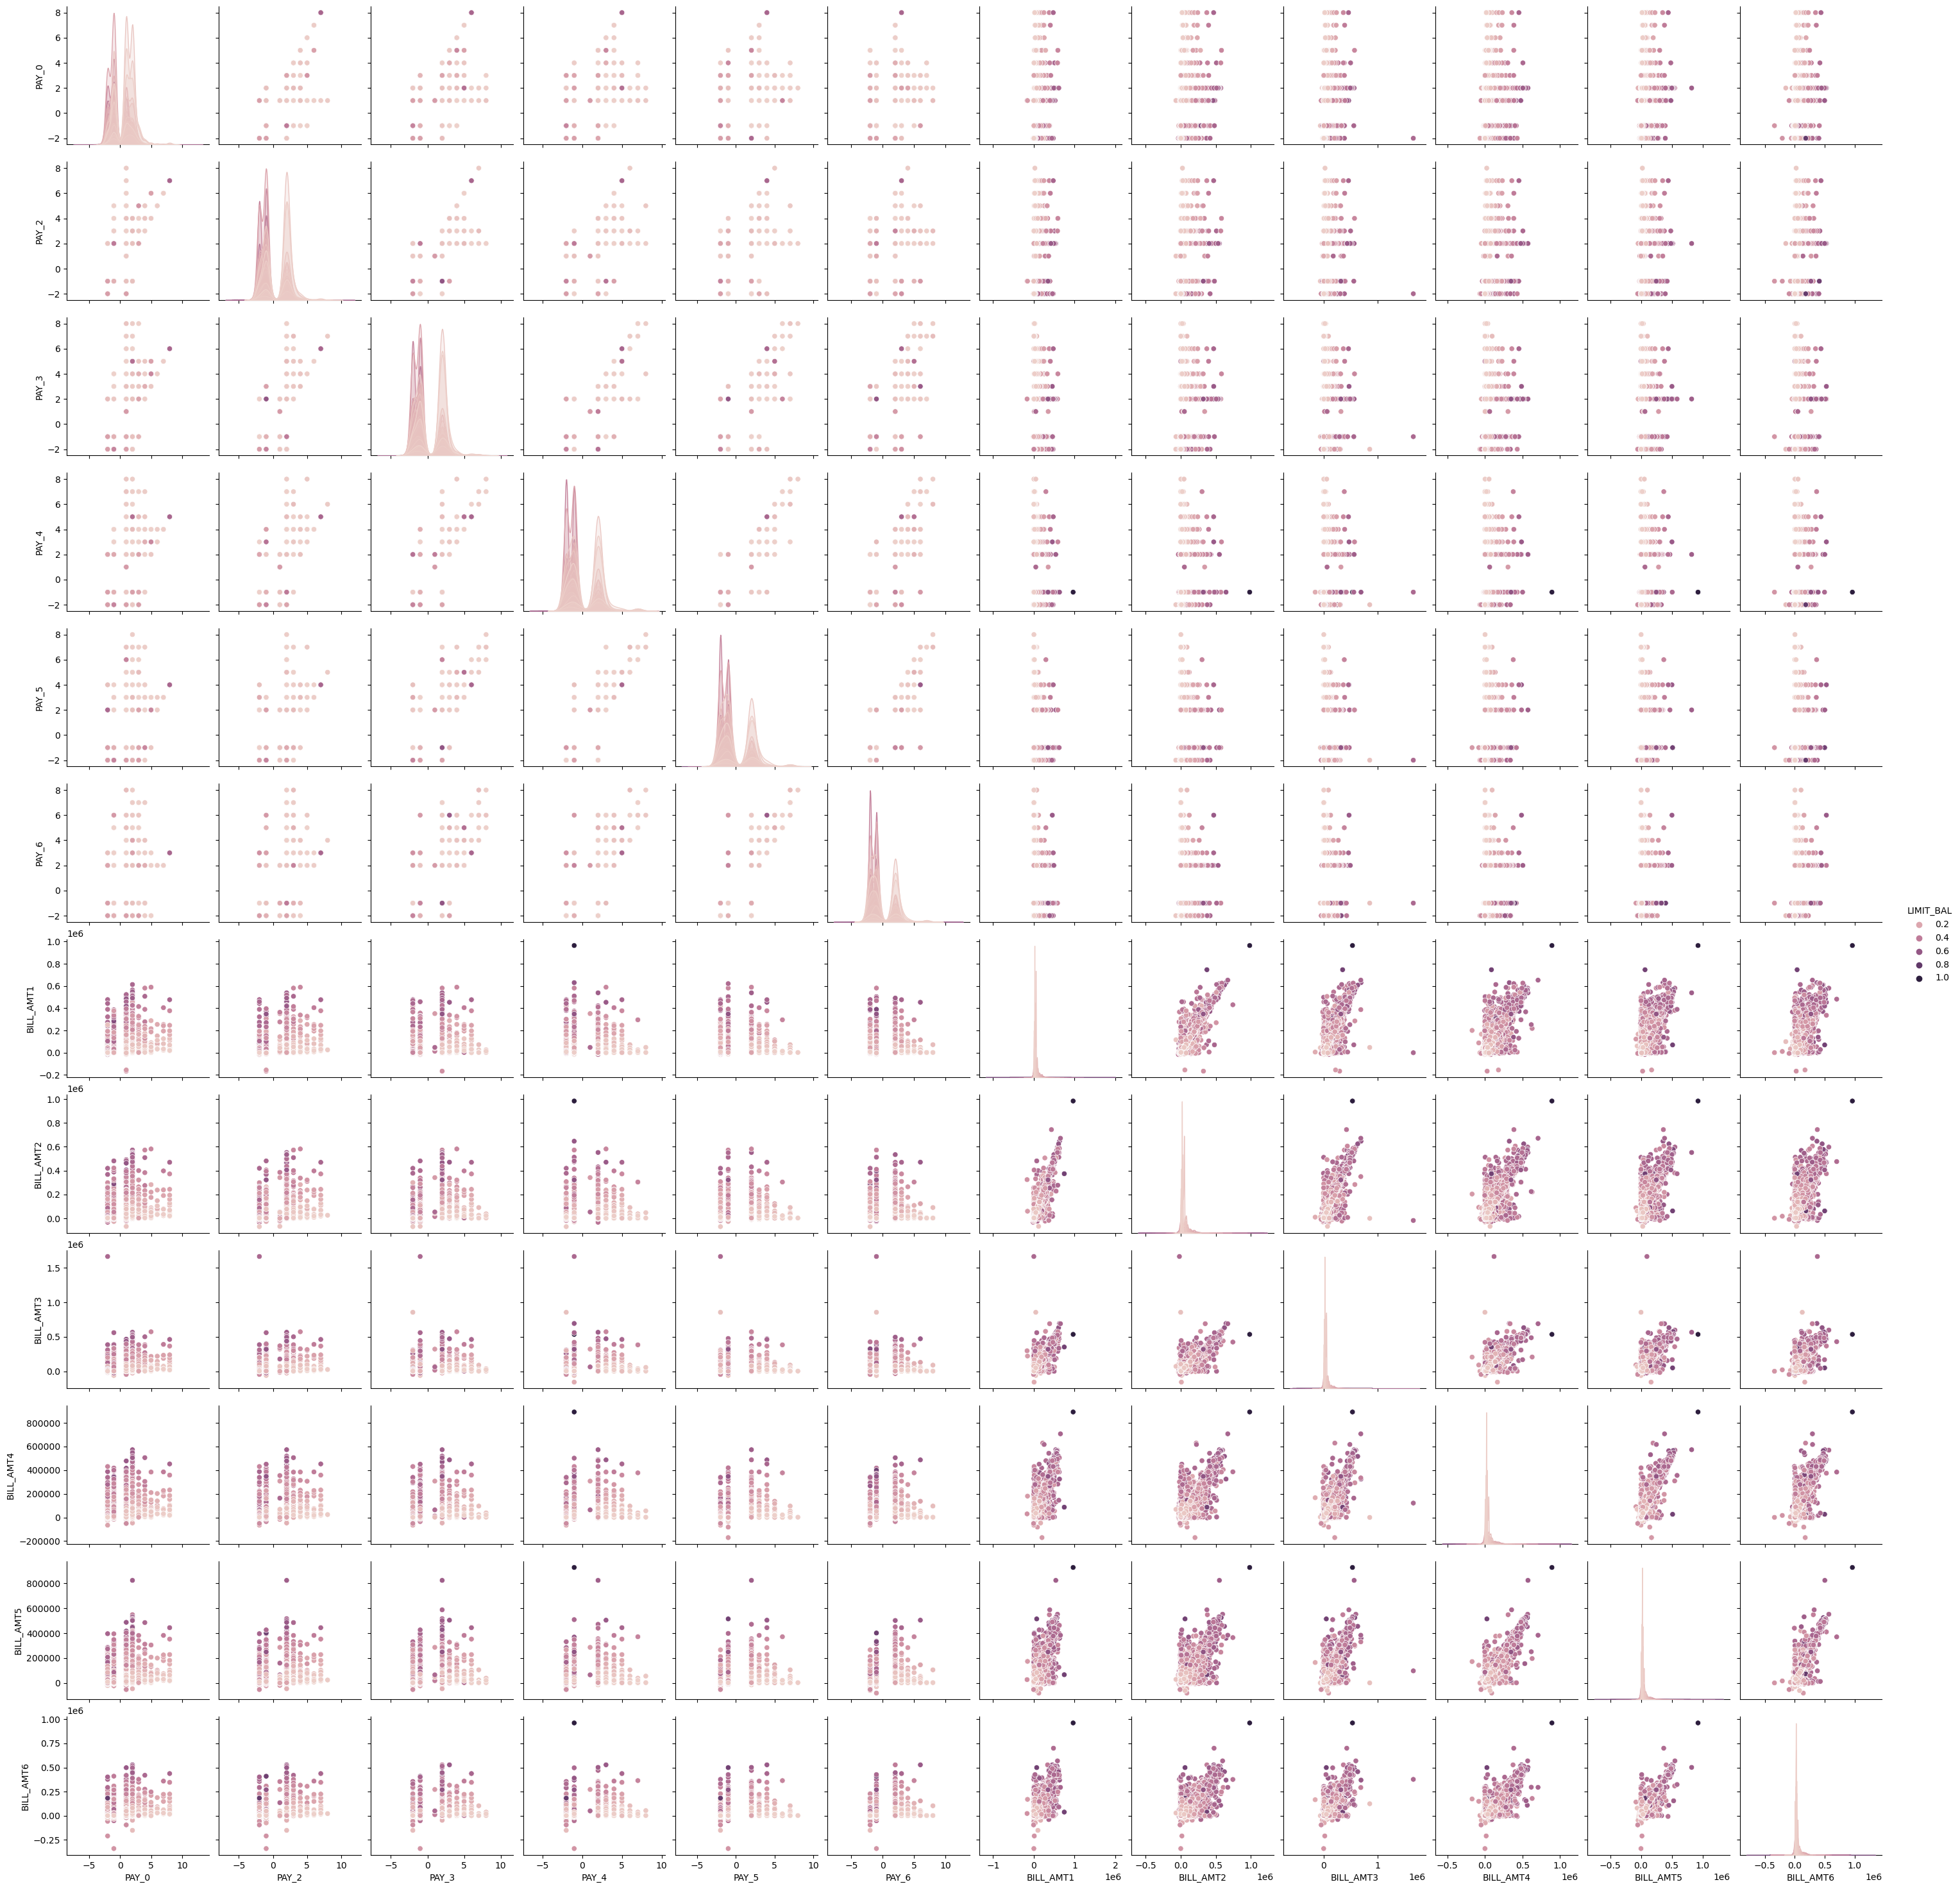

In [23]:
#are the correlations between the variables significant 'AGeGroup'
sns.pairplot(ds[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], hue='LIMIT_BAL')
plt.show()

#### 3-Data Preparation

In [35]:
# Data Preparation
# Create a modeling dataset from the original dataset

ds_modeling = ds.copy(deep=True) # deep=True to create a copy of the data and the indices
ds_modeling.head(20)

#find the columns with outliers
ds_modeling[numerical].describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,15263.000000,14270.000000,14236.000000,13545.000000,13053.000000,13714.000000,27992.000000,27494.000000,2.713000e+04,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,167484.322667,35.485500,-0.032824,-0.281219,-0.350239,-0.488741,-0.611813,-0.636795,54897.825343,53661.608169,5.198653e+04,48419.640701,45645.883181,44886.559353,6864.668700,7.219757e+03,6523.404003,6136.923788,6180.264798,6854.386341
std,129747.661567,9.217904,1.575400,1.723888,1.718833,1.701918,1.655285,1.634909,74896.515914,72711.059216,7.113061e+04,66199.329394,62784.900318,61850.740349,18007.764374,2.525748e+04,19455.787345,17437.005758,17089.655767,20102.694124
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,50000.000000,28.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,6059.750000,6239.000000,6.570500e+03,6569.000000,5962.500000,5418.500000,1610.000000,1.502000e+03,1200.750000,1000.000000,1000.000000,1000.000000
50%,140000.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,26732.500000,26848.000000,2.592550e+04,23437.000000,21319.000000,20818.500000,3000.000000,3.000000e+03,2499.000000,2200.000000,2300.000000,2386.000000
75%,240000.000000,41.000000,1.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,72184.250000,70286.500000,6.801950e+04,62630.000000,58516.250000,57462.500000,6005.000000,6.000000e+03,5264.250000,5000.000000,5000.000000,5002.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [54]:
# Let's assume LIMIT_BAL, PAY_0, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 values have outliers values, so we will remove them
#remove the outliers with the IQR method
# |----|   |   |------|
# IQR = Q3 - Q1
# Q1 = 25th percentile
# Q3 = 75th percentile
# IQR = Q3 - Q1
# Lower bound = Q1 - 1.5 * IQR
# Upper bound = Q3 + 1.5 * IQR
'''
# Calculate the first and third quartile
first_quartile = ds_modeling['LIMIT_BAL'].quantile(0.25)
third_quartile = ds_modeling['LIMIT_BAL'].quantile(0.75)

# Interquartile range
iqr = third_quartile - first_quartile

# Remove the outliers
ds_modeling = ds_modeling[(ds_modeling['LIMIT_BAL'] > first_quartile - 1.5 * iqr) & (ds_modeling['LIMIT_BAL'] < third_quartile + 1.5 * iqr)]
ds_modeling['LIMIT_BAL'].describe()
'''
#   & (ds_modeling['BILL_AMT3'] < 20000)
ds_modeling = ds_modeling[(ds_modeling['LIMIT_BAL'] < 800000000000) & (ds_modeling['PAY_0'] < 4) & (ds_modeling['BILL_AMT1'] < 80000000000) & (ds_modeling['BILL_AMT2'] < 80000000000) & (ds_modeling['BILL_AMT4'] < 80000000000) & (ds_modeling['BILL_AMT5'] < 80000000000) & (ds_modeling['BILL_AMT6'] < 8000000000) ]
ds_modeling.head(10)
ds_modeling.shape

(3130, 25)

In [55]:
# compare the original dataset with the modeling dataset
#original dataset
ds[numerical].describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,15263.000000,14270.000000,14236.000000,13545.000000,13053.000000,13714.000000,27992.000000,27494.000000,2.713000e+04,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,167484.322667,35.485500,-0.032824,-0.281219,-0.350239,-0.488741,-0.611813,-0.636795,54897.825343,53661.608169,5.198653e+04,48419.640701,45645.883181,44886.559353,6864.668700,7.219757e+03,6523.404003,6136.923788,6180.264798,6854.386341
std,129747.661567,9.217904,1.575400,1.723888,1.718833,1.701918,1.655285,1.634909,74896.515914,72711.059216,7.113061e+04,66199.329394,62784.900318,61850.740349,18007.764374,2.525748e+04,19455.787345,17437.005758,17089.655767,20102.694124
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,50000.000000,28.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,6059.750000,6239.000000,6.570500e+03,6569.000000,5962.500000,5418.500000,1610.000000,1.502000e+03,1200.750000,1000.000000,1000.000000,1000.000000
50%,140000.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,26732.500000,26848.000000,2.592550e+04,23437.000000,21319.000000,20818.500000,3000.000000,3.000000e+03,2499.000000,2200.000000,2300.000000,2386.000000
75%,240000.000000,41.000000,1.000000,2.000000,2.000000,2.000000,-1.000000,-1.000000,72184.250000,70286.500000,6.801950e+04,62630.000000,58516.250000,57462.500000,6005.000000,6.000000e+03,5264.250000,5000.000000,5000.000000,5002.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [56]:
#modeling dataset
ds_modeling[numerical].describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3130.000000,3130.000000,3130.000000,2617.000000,2008.000000,1694.000000,1507.000000,1516.000000,3130.000000,3130.000000,3105.000000,3130.000000,3130.000000,3130.000000,2044.000000,2368.000000,2388.000000,2404.000000,2462.000000,2284.000000
mean,38746.325879,34.398083,1.014696,1.402369,1.347112,1.347698,1.350365,1.250000,21906.532268,22235.226198,22259.893398,20770.613738,19615.775080,19435.910543,3543.672211,3093.305321,2529.084171,2539.654742,2376.418765,2485.862960
std,17132.728550,10.437597,1.297208,1.443019,1.653771,1.863982,1.912947,1.905741,18932.113865,18607.728697,17924.741129,16536.854282,15190.577943,15328.635314,7420.961012,6174.118568,4525.500518,5699.922717,4462.631357,5110.556751
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-61506.000000,-15000.000000,-15000.000000,-21364.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20000.000000,25.000000,1.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,5966.750000,7062.750000,8164.000000,7893.750000,7981.500000,7552.000000,1297.250000,1286.500000,1000.000000,800.000000,800.000000,800.000000
50%,40000.000000,32.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,17954.000000,18402.000000,19004.000000,18650.500000,18378.000000,18244.500000,1900.000000,1900.000000,1500.000000,1170.000000,1200.000000,1200.000000
75%,50000.000000,42.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,31651.250000,32048.000000,31130.000000,29287.000000,28543.750000,28606.250000,3000.000000,3000.000000,2250.000000,2000.000000,2000.000000,2000.000000
max,70000.000000,72.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,127510.000000,123969.000000,128267.000000,139912.000000,136604.000000,134705.000000,144047.000000,140043.000000,73000.000000,87230.000000,51830.000000,72697.000000


In [49]:
#original dataset
ds.shape

(30000, 25)

In [57]:
#modeling dataset
ds_modeling.shape

(3130, 25)

In [60]:
# Encode categorical values into dummy variables, onehotencoder is  a class that has a method called fit_transform that will transform the data into dummy variables, ce is a library that has the onehotencoder class
#use_cat_names = True to use the categorical variable names as prefix 
onehotencoder = ce.OneHotEncoder(cols=['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month', 'AGeGroup'],  use_cat_names=True)
ds_modeling_ce_one_hot = onehotencoder.fit_transform(ds_modeling)
ds_modeling_ce_one_hot.head(10)


,LIMIT_BAL,SEX_1.0,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_1.0,EDUCATION_5.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month_nan,default payment next month_1.0,AGeGroup_21-28,AGeGroup_28-34,AGeGroup_34-41,AGeGroup_41-79
5,50000,1,0,1,0,0,0,1,0,0,...,10000.0,9000.0,689.0,679.0,1,0,0,0,0,1
14,70000,1,0,1,0,0,0,0,1,0,...,3000.0,3000.0,1500.0,NaN,0,1,1,0,0,0
16,50000,0,1,0,1,0,0,0,0,1,...,1100.0,1200.0,1300.0,1100.0,1,0,1,0,0,0
23,70000,0,1,1,0,0,0,0,1,0,...,NaN,3601.0,NaN,1820.0,0,1,1,0,0,0
27,60000,1,0,0,0,1,0,0,1,0,...,NaN,500.0,NaN,1000.0,0,1,1,0,0,0
29,50000,0,1,0,1,0,0,1,0,0,...,2044.0,30430.0,257.0,NaN,1,0,0,0,1,0
32,50000,1,0,1,0,0,0,0,1,0,...,1000.0,1000.0,1000.0,716.0,0,1,1,0,0,0
51,70000,1,0,0,1,0,0,0,1,0,...,2000.0,NaN,1500.0,1500.0,0,1,0,1,0,0
63,50000,1,0,0,0,1,0,0,1,0,...,NaN,2225.0,1200.0,NaN,0,1,1,0,0,0
67,10000,1,0,1,0,0,0,1,0,0,...,150.0,200.0,200.0,160.0,0,1,0,0,0,1


#### 4.Modeling

In [62]:
## develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year.
# Splitting the dataset into the Training set and Test set

X = ds_modeling_ce_one_hot.drop(['LIMIT_BAL'], axis=1)

y = ds_modeling_ce_one_hot['LIMIT_BAL'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123) # 75% training and 25% test


X

,SEX_1.0,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_1.0,EDUCATION_5.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0,MARRIAGE_nan,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month_nan,default payment next month_1.0,AGeGroup_21-28,AGeGroup_28-34,AGeGroup_34-41,AGeGroup_41-79
5,1,0,1,0,0,0,1,0,0,0,...,10000.0,9000.0,689.0,679.0,1,0,0,0,0,1
14,1,0,1,0,0,0,0,1,0,0,...,3000.0,3000.0,1500.0,NaN,0,1,1,0,0,0
16,0,1,0,1,0,0,0,0,1,0,...,1100.0,1200.0,1300.0,1100.0,1,0,1,0,0,0
23,0,1,1,0,0,0,0,1,0,0,...,NaN,3601.0,NaN,1820.0,0,1,1,0,0,0
27,1,0,0,0,1,0,0,1,0,0,...,NaN,500.0,NaN,1000.0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29975,1,0,1,0,0,0,1,0,0,0,...,NaN,NaN,1000.0,1000.0,0,1,0,1,0,0
29977,1,0,1,0,0,0,0,1,0,0,...,2000.0,NaN,3520.0,NaN,0,1,0,0,1,0
29982,1,0,1,0,0,0,1,0,0,0,...,NaN,517.0,503.0,585.0,1,0,0,1,0,0
29984,1,0,1,0,0,0,1,0,0,0,...,2890.0,9263.0,1824.0,1701.0,1,0,0,1,0,0


4.1-Tree Regressor

In [63]:
tree_regressor=tree.DecisionTreeRegressor(random_state=123, max_depth=4, min_samples_leaf=5)

In [ ]:
tree_regressor.fit(X, y, sample_weight=None, check_input=True)
tree_regressor

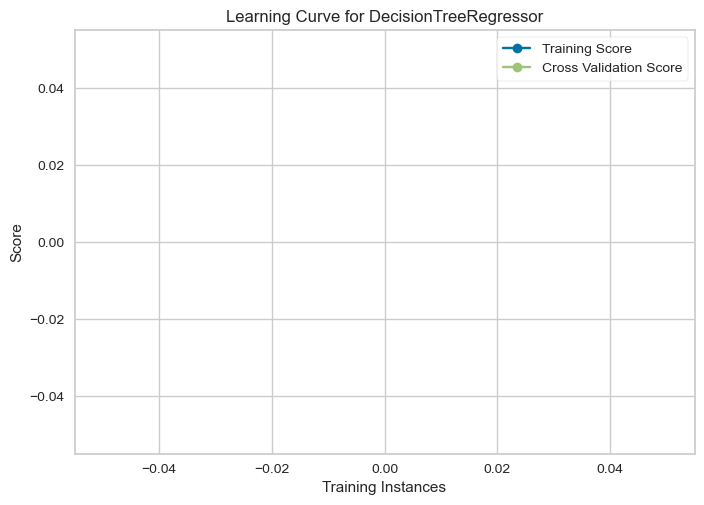

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [65]:
# Instantiate the learning curve visualizer,
# Plot the learning curve,

cv = 10 # cross validation with 10 folds
sizes = np.linspace(0.1, 1.0, 5)
visualizer = LearningCurve(estimator=tree_regressor, cv=cv, scoring='r2', train_sizes=sizes, n_jobs=4, random_state=123)
visualizer.fit(X, y)
visualizer.show()    

In [ ]:
# Plot the tree
# Install Graphviz using \"pip install graphviz\" or \"conda install python-graphviz\
import graphviz
dot_data = tree.export_graphviz(tree_regressor, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names='Returns',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
##forecast the data to know how many claims will each policy holder from a car insurer in  have in the following year

# Predicting the Test set results
y_pred = tree_regressor.predict(X_test)

# print the first 10 predicted responses
print('first 10 predicted: ',y_pred[0:10])

# print the first 10 actual responses
print('first 10 actual: ',y_test[0:10])